**LINEAR REGRESSION IN BOSTON TO PREDICT MEDIAN HOUSE PRICES**

Kali ini akan mencoba linear regression untuk memprediksi harga median rumah di Boston berdasarkan data yang diberikan oleh DQLab melalui data dari [*Boston Housing Prices*](https://www.kaggle.com/datasets/vikrishnan/boston-house-prices).

Total terdapat 14 variabel (13 Independent Variable/Features dan 1 Dependent Variable/Target) dengan penjelasan sebagai berikut:
1. **CRIM** (*Crime Rate per Capita*)
Menunjukkan tingkat kejahatan per kapita di setiap kota atau daerah dalam Boston SMSA.
2. **ZN** (*Zoning for Large Residential Lots*)
Persentase luas tanah yang digunakan untuk hunian dengan ukuran lot lebih dari 25.000 kaki persegi.
3. **INDUS** (*Industrial Land Proportion*)
Persentase luas tanah yang digunakan untuk bisnis non-ritel di setiap kota atau daerah.
4. **CHAS** (*Charles River Dummy Variable*)
Variabel dummy yang menunjukkan apakah daerah berbatasan dengan Sungai Charles atau tidak.
1 → Jika daerah berbatasan dengan Sungai Charles.
0 → Jika tidak berbatasan.
5. **NOX** (*Nitric Oxide Concentration*)
Konsentrasi gas nitrogen oksida (NOx) di udara dalam parts per 10 million (ppm).
Menunjukkan tingkat polusi udara di area tersebut.
6. **RM** (*Average Rooms per Dwelling*)
Rata-rata jumlah kamar dalam setiap rumah di area tersebut.
7. **AGE** (*Proportion of Old Housing*)
Persentase unit rumah yang dimiliki oleh pemilik sendiri (owner-occupied) yang dibangun sebelum tahun 1940.
Semakin tinggi nilai AGE, semakin tua rata-rata rumah di daerah tersebut.
8. **DIS** (*Distance to Employment Centers*)
Jarak tertimbang ke lima pusat pekerjaan utama di Boston.
Mengukur aksesibilitas daerah ke pusat kota.
9. **RAD** (*Accessibility to Highways*)
Indeks aksesibilitas ke jalan raya utama (radial highways).
Semakin tinggi nilai RAD, semakin mudah akses daerah tersebut ke jalan utama.
10. **TAX** (*Property Tax Rate*)
Tarif pajak properti penuh per $10.000 dari nilai properti.
Menunjukkan beban pajak properti di area tersebut.

11. **PTRATIO** (*Pupil-Teacher Ratio*)
Rasio jumlah murid terhadap guru di sekolah-sekolah di daerah tersebut.
Nilai tinggi berarti lebih banyak murid per guru, yang bisa mencerminkan kualitas pendidikan yang lebih rendah.
12. **B** (*Ethnicity Proportion*)
Rumus: B = 1000(Bk - 0.63)², di mana Bk adalah proporsi penduduk berkulit hitam di daerah tersebut.
Mengukur tingkat segregasi rasial.
13. **LSTAT** (*Lower Status Population*)
Persentase populasi dengan status sosial ekonomi rendah.
Semakin tinggi LSTAT, semakin rendah tingkat ekonomi rata-rata penduduk di daerah tersebut.
14. **MEDV** (*Median House Value*)
Nilai median dari harga rumah di daerah tersebut, dalam ribu dolar ($1000s).
Ini adalah variabel target yang sering diprediksi dalam model regresi.


---




Tahap 1. Import data

In [162]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [163]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/01 Home Work DQLab/01 Housing Data/HousingData.csv')
dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0




---


Tahap 2. Melakukan EDA dan Cleansing Data

In [164]:
dataset.info() #data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [165]:
dataset.describe() #Stat Descriptive sebelum cleansing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [166]:
dataset.shape[0] #menghitung jumlah row

506

In [167]:
dataset.isnull().sum() #Melakukan deteksi nilai null pada data

,0
CRIM,20
ZN,20
INDUS,20
CHAS,20
NOX,0
RM,0
AGE,20
DIS,0
RAD,0
TAX,0


Didapatkan bahwa terdapat masing-masing 20 row pada kolom
1. CRIM
2. ZN
3. INDUS
4. CHAS
5. AGE
6. LSTAT

In [168]:
dataset.duplicated().sum() # Melakukan deteksi baris yang ter-duplikat, hasil menunjukan nilai 0 artinya tidak ada yang terduplikat

0

In [169]:
dataset_clean = dataset.dropna() # Melakukan cleansing data yang nilainya NaN, terlihat bahwa jumlah rows dari 504 menjadi sebanyak 394 rows (tereduksi 110 rows)
dataset_clean

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


In [170]:
dataset_clean.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.690136,11.460660,11.000863,0.068528,0.553215,6.280015,68.932741,3.805268,9.403553,406.431472,18.537563,358.490939,12.769112,22.359645
std,9.202423,23.954082,6.908364,0.252971,0.113112,0.697985,27.888705,2.098571,8.633451,168.312419,2.166460,89.283295,7.308430,9.142979
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.600000,1.730000,5.000000
25%,0.081955,0.000000,5.130000,0.000000,0.453000,5.879250,45.475000,2.110100,4.000000,280.250000,17.400000,376.707500,7.125000,16.800000
50%,0.268880,0.000000,8.560000,0.000000,0.538000,6.201500,77.700000,3.199200,5.000000,330.000000,19.100000,392.190000,11.300000,21.050000
75%,3.435973,12.500000,18.100000,0.000000,0.624000,6.605500,94.250000,5.116700,24.000000,666.000000,20.200000,396.900000,17.117500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Berdasarkan data di atas, yang perlu dihighlight diantaranya:
1. CRIM, nilai mean nya (3.69) dengan nilai median (0.26) terpaut jauh, datanya cenderung skewed positif (mean > median)
2. ZN, nilai mean nya (11.46) sedangkan nilai mediannya (0) ini menunjukan bahwa datanya cenderung skewed positif (mean > median) dan datanya banyak nilai 0 (min = 0 dan median = 0)
3. CHAS, ini kolom biner, pilihannya antara 1 dan 0 statistik tidak terlalu penting
4. RAD, nilai mean (9.4) sedangkan nilai median (5) ini menunjukan bahwa datanya cenderung skewed positif (mean > median)
5. B, nilai min (2.6) sangat kecil jika dibandingkan dengan nilai max nya (396) bisa jadi ada outlier

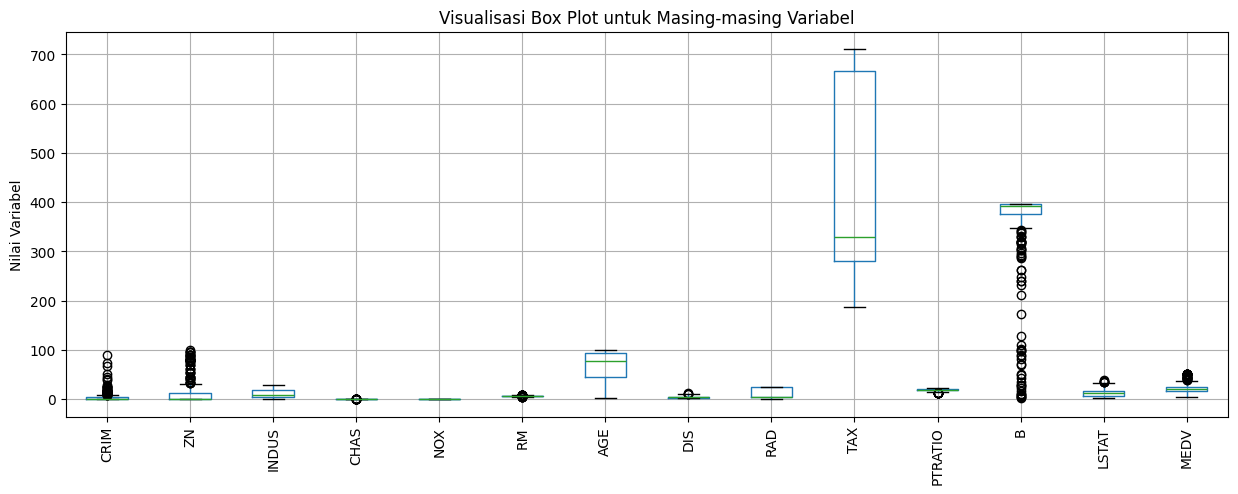

In [171]:
plt.figure(figsize=(15,5))
dataset_clean.boxplot(rot=90)
plt.title('Visualisasi Box Plot untuk Masing-masing Variabel')
y_label = dataset_clean.columns
plt.ylabel('Nilai Variabel')
plt.show()

Berdasarkan data boxplot di atas, beberapa yang perlu dihighlight akibat adanya banyak data yang diluar masing-masing box dan dapat diinterpretasikan adalah outlier diantaranya:
1. CRIM
2. ZN
3. B


---

Tahap 3. Test Data Spilt



In [172]:
features = dataset_clean.drop(columns='MEDV') # Memisahkan variabel features
features

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64


In [173]:
target = dataset_clean['MEDV'] # Memisahkan variable target
target

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
5,28.7
...,...
499,17.5
500,16.8
502,20.6
503,23.9


In [174]:
from sklearn.model_selection import train_test_split #import modul train_test_split dari sklearn
x_train, x_test, y_train, y_test = train_test_split(features, target, train_size=0.75,random_state=1) # Mengambil random data dari MEDV untuk train dan test, persentase Train 75% dan test 25%
y_train

,MEDV
227,31.6
129,14.3
265,22.8
114,18.5
307,28.2
...,...
260,33.8
327,22.2
85,26.6
306,33.4


In [175]:
y_test

,MEDV
96,21.4
289,24.8
456,12.7
143,15.6
267,50.0
...,...
105,19.5
395,13.1
86,22.5
490,8.1




---

Tahap 4. Melakukan Model Linear Regresi

In [176]:
from sklearn.linear_model import LinearRegression # Import modul Regresi Linear

In [213]:
model = LinearRegression() # Melakukan model linear regression
model.fit(x_train,y_train)

LinearRegression()

In [214]:
model.predict(x_test) # Melakukan uji coba nilai y_test terhadap nilai x_test

array([24.37220073, 26.57745623, 11.48924061, 12.1557786 , 40.49421819,
       31.53315689, 29.04907925, 22.72370488, 28.5261511 , 19.15532846,
       18.61538739, 21.43972214, 13.02481573, 45.03289209, 20.28825987,
       25.48764291, 21.01566917, 27.48581851, 10.38027706, 22.66487018,
       27.23581319, 24.38292427,  8.40814108, 24.79416253, 18.7998984 ,
        9.05597176, 19.94661267,  8.07162413, 28.31006495, 23.4547383 ,
       17.6037524 , 23.42897058, 28.70000123, 17.21549196, 34.28419243,
       24.9852338 , 42.50275055, 16.07903941, 32.98688158, 16.00738643,
       31.76522178, 25.16730287, 14.77463935, 23.37187343, 19.60543923,
       41.25840841, 20.24302731, 27.39909439, 21.47359018, 19.77753403,
       23.53349208, 36.84832917, 27.41766912, 22.84188166, 13.2246131 ,
       32.64441157,  9.60632854, 17.84171917, 16.18330962, 17.3382023 ,
        0.2025043 , 22.24199458, 30.84910124, 23.14107464, 34.75791036,
       28.78994281,  5.41446949, 19.87936631, 20.3923725 , 16.89



---
Tahap 5. Melakukan Uji Test R2 dan RMSE untuk Mengevaluasi Hasil Model


In [215]:
from sklearn.metrics import r2_score, root_mean_squared_error # Import modul R2 dan RMSE

In [216]:
r2_score(y_test, model.predict(x_test)) # Pengujian R2

0.7602139364101058

In [217]:
root_mean_squared_error(y_test, model.predict(x_test)) # Pengujian RMSE

4.579022045670724

Penjelasan:
1. R2 Score, berdasarkan hasil pengujian/evaluasi didapatkan nilai 0.76 atau 76.02% yang dapat diinterpretasikan model mampu menjelaskan seluruh variasi dalam data (mendekati 1)
2. RMSE, berdasarkan hasil pengujian/evaluasi didapatkan nilai galat sebesar 4.57 (1000s Dollar USD).
Sebagai perbandingan dibandingkan dengan nilai std.dev sebesar 9.14 (1000s Dollar USD), nilai galat model lebih rendah (RMSE < Standar Deviasi).

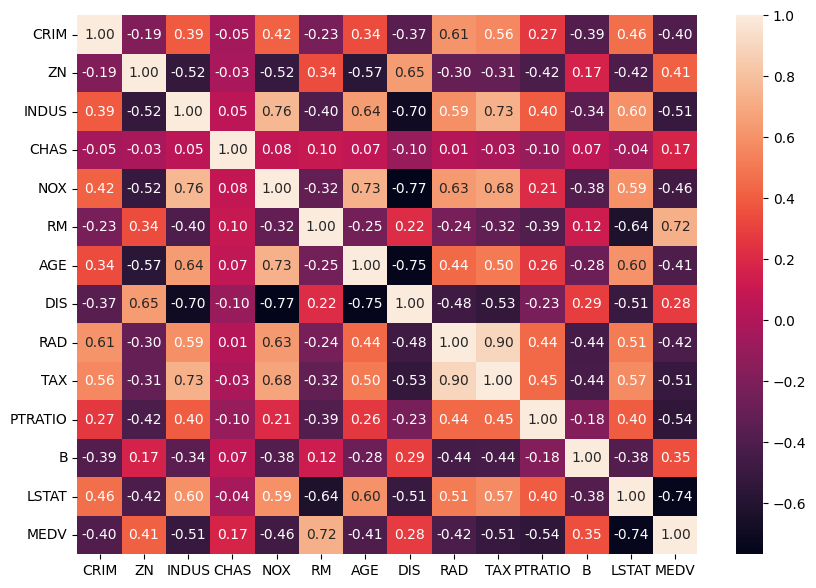

In [218]:
# Melakukan visualisasi heat map untuk melihat korelasi antar variable (Multicollinearity)
plt.figure(figsize=(10,7))
sns.heatmap(dataset_clean.corr(), annot=True, fmt='.2f')
plt.show()

Berdasarkan visualisasi heatmap, terlihat korelasi yang sangat tinggi antara variabel RAD dan TAX (mencapai 0.90). Ini perlu perhatian khusus, dengan mencoba menghilangkan salah satu dari variabel tersebut di dalam model.

In [219]:
# Melakukan perhitungan VIF (Variance Inflation Factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant
x_vif = add_constant(x_train)
vif_dataset_clean = pd.DataFrame([vif(x_vif.values,i)
for i in range (x_vif.shape[1])], index = x_vif.columns).reset_index()
vif_dataset_clean.columns = ['features','vif_score']
vif_dataset_clean = vif_dataset_clean.loc[vif_dataset_clean.features!='const']
vif_dataset_clean['vif_score']=vif_dataset_clean['vif_score'].round(2)
vif_dataset_clean

,features,vif_score
1,CRIM,1.96
2,ZN,2.53
3,INDUS,4.35
4,CHAS,1.07
5,NOX,4.57
6,RM,2.01
7,AGE,2.97
8,DIS,4.05
9,RAD,7.17
10,TAX,9.10


In [220]:
# Membuat fungsi untuk mengklasifikasikan vif_score
def classify_vif (vif_score):
  if vif_score <= 1:
    return "No Multicollinearity"
  elif vif_score >= 4 and vif_score < 10:
    return "Moderate Multicollinearity"
  elif vif_score >= 10:
    return "High Multicollinearity"
  else :
    return "Low Multicollinearity"

vif_dataset_clean['vif_class']=vif_dataset_clean['vif_score'].apply(classify_vif)
vif_dataset_clean

,features,vif_score,vif_class
1,CRIM,1.96,Low Multicollinearity
2,ZN,2.53,Low Multicollinearity
3,INDUS,4.35,Moderate Multicollinearity
4,CHAS,1.07,Low Multicollinearity
5,NOX,4.57,Moderate Multicollinearity
6,RM,2.01,Low Multicollinearity
7,AGE,2.97,Low Multicollinearity
8,DIS,4.05,Moderate Multicollinearity
9,RAD,7.17,Moderate Multicollinearity
10,TAX,9.10,Moderate Multicollinearity


Berdasarkan tabel di atas, didapatkan bahwa memang variabel RAD dan TAX nilainya sangat tinggi mendekati 10. Hal menarik lainnya yang sama-sama di kategorikan 'Moderate Multicollinearity' adalah variabel INDUS, NOX, dan DIS.
1. RAD dan TAX perlu untuk di coba dihilangkan salah-satunya.
2. INDUS, NOX, DIS perlu diperhatikan

---



---

Tahap 5. Mencoba untuk Menghilangkan Variable Tertentu

In [221]:
features_no_RAD = features.drop(columns=['RAD']) # Menghilangkan kolom RAD
features_no_RAD

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,222,18.7,394.63,2.94
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,222,18.7,394.12,5.21
...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,391,19.2,395.77,15.10
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,391,19.2,396.90,14.33
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,273,21.0,396.90,5.64


In [222]:
features_no_TAX = features.drop(columns=['TAX']) # Menghilangkan Kolom TAX
features_no_TAX

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,18.7,394.63,2.94
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,18.7,394.12,5.21
...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,19.2,395.77,15.10
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,19.2,396.90,14.33
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,21.0,396.90,5.64


In [223]:
# Model Features Tanpa RAD
x_train_no_RAD,x_test_no_RAD, y_train_no_RAD, y_test_no_RAD = train_test_split(features_no_RAD, target, train_size=0.75, random_state=1)
model_no_RAD = LinearRegression()
model_no_RAD.fit(x_train_no_RAD,y_train_no_RAD)
model_no_RAD.predict(x_test_no_RAD)

array([24.82982707, 25.89889407, 10.98362327, 12.92515104, 40.37242458,
       32.04247317, 28.08077728, 23.53788081, 29.14786957, 19.83622597,
       18.04599955, 23.19061242, 12.90187562, 44.86880628, 19.37624774,
       25.56558974, 20.93849639, 27.21508548,  9.95148621, 25.27661304,
       26.77621437, 24.28990337,  9.01957533, 26.68641364, 18.48797487,
        9.57184262, 20.50657325,  7.58192791, 28.95208698, 23.49262106,
       17.16761324, 23.48082871, 28.77891533, 18.06887759, 33.56863326,
       24.37014967, 41.43565034, 15.33942665, 32.04327865, 16.44873124,
       32.08776952, 25.19435147, 15.56532328, 24.66281657, 20.49276369,
       40.14699481, 18.36468271, 27.22917662, 21.34482333, 20.58201112,
       23.9380326 , 36.72135086, 26.78495817, 23.38034795, 12.37146345,
       32.50971208,  8.89959589, 18.24582424, 15.07380167, 16.71918034,
       -0.60455297, 22.07440658, 32.09158879, 23.11990937, 33.8006604 ,
       28.28276323,  4.50502804, 20.43006838, 19.85616675, 16.42

In [224]:
x_test_no_RAD # Cek apa memang betul sudah tanpa RAD

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
96,0.11504,0.0,2.89,0.0,0.445,6.163,69.6,3.4952,276,18.0,391.83,11.34
289,0.04297,52.5,5.32,0.0,0.405,6.565,22.9,7.3172,293,16.6,371.72,9.51
456,4.66883,0.0,18.10,0.0,0.713,5.976,87.9,2.5806,666,20.2,10.48,19.01
143,4.09740,0.0,19.58,0.0,0.871,5.468,100.0,1.4118,403,14.7,396.90,26.42
267,0.57834,20.0,3.97,0.0,0.575,8.297,67.0,2.4216,264,13.0,384.54,7.44
...,...,...,...,...,...,...,...,...,...,...,...,...
105,0.13262,0.0,8.56,0.0,0.520,5.851,96.7,2.1069,384,20.9,394.05,16.47
395,8.71675,0.0,18.10,0.0,0.693,6.471,98.8,1.7257,666,20.2,391.98,17.12
86,0.05188,0.0,4.49,0.0,0.449,6.015,45.1,4.4272,247,18.5,395.99,12.86
490,0.20746,0.0,27.74,0.0,0.609,5.093,98.0,1.8226,711,20.1,318.43,29.68


In [225]:
# Model Features Tanpa TAX
x_train_no_TAX,x_test_no_TAX, y_train_no_TAX, y_test_no_TAX = train_test_split(features_no_TAX,target,train_size=0.75,random_state=1)
model_no_TAX = LinearRegression()
model_no_TAX.fit(x_train_no_TAX,y_train_no_TAX)
model_no_TAX.predict(x_test_no_TAX)

array([ 2.49031919e+01,  2.61317041e+01,  1.14498651e+01,  1.20191776e+01,
        4.03820134e+01,  3.17507639e+01,  2.78907293e+01,  2.33043149e+01,
        2.91051549e+01,  1.96250941e+01,  1.86077429e+01,  2.33498017e+01,
        1.30106133e+01,  4.46125818e+01,  2.02718897e+01,  2.55136965e+01,
        2.12405309e+01,  2.74260412e+01,  1.03135017e+01,  2.50961774e+01,
        2.68183398e+01,  2.43211335e+01,  8.23114043e+00,  2.67443011e+01,
        1.87915619e+01,  9.07003062e+00,  2.03586825e+01,  7.96985259e+00,
        2.80619184e+01,  2.33392394e+01,  1.75838568e+01,  2.32477901e+01,
        2.86586511e+01,  1.77121639e+01,  3.32353307e+01,  2.43534387e+01,
        4.14240755e+01,  1.60092492e+01,  3.20632917e+01,  1.60115852e+01,
        3.22994051e+01,  2.51173170e+01,  1.46618206e+01,  2.35660668e+01,
        1.96362915e+01,  4.01667313e+01,  1.77268314e+01,  2.71036895e+01,
        2.14975685e+01,  2.03471606e+01,  2.40265066e+01,  3.64782065e+01,
        2.70058271e+01,  

In [226]:
x_test_no_TAX # Cek apa memang betul sudah tanpa TAX

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT
96,0.11504,0.0,2.89,0.0,0.445,6.163,69.6,3.4952,2,18.0,391.83,11.34
289,0.04297,52.5,5.32,0.0,0.405,6.565,22.9,7.3172,6,16.6,371.72,9.51
456,4.66883,0.0,18.10,0.0,0.713,5.976,87.9,2.5806,24,20.2,10.48,19.01
143,4.09740,0.0,19.58,0.0,0.871,5.468,100.0,1.4118,5,14.7,396.90,26.42
267,0.57834,20.0,3.97,0.0,0.575,8.297,67.0,2.4216,5,13.0,384.54,7.44
...,...,...,...,...,...,...,...,...,...,...,...,...
105,0.13262,0.0,8.56,0.0,0.520,5.851,96.7,2.1069,5,20.9,394.05,16.47
395,8.71675,0.0,18.10,0.0,0.693,6.471,98.8,1.7257,24,20.2,391.98,17.12
86,0.05188,0.0,4.49,0.0,0.449,6.015,45.1,4.4272,3,18.5,395.99,12.86
490,0.20746,0.0,27.74,0.0,0.609,5.093,98.0,1.8226,4,20.1,318.43,29.68


In [227]:
# Pengujian Hasil R2 dan RMSE Masing-masing

# 1. Pengujian R2 Score
# Untuk no RAD
r2_no_RAD = r2_score(y_test_no_RAD,model_no_RAD.predict(x_test_no_RAD))
print('Nilai r2_score TANPA variabel RAD :',round(r2_no_RAD,3))
# Untuk no TAX
r2_no_TAX = r2_score(y_test_no_TAX,model_no_TAX.predict(x_test_no_TAX))
print('Nilai r2_score TANPA variabel TAX :',round(r2_no_TAX,3))

Nilai r2_score TANPA variabel RAD : 0.736
Nilai r2_score TANPA variabel TAX : 0.746


In [228]:
# 2. Pengujian RMSE
# Untuk no RAD
rmse_no_RAD = root_mean_squared_error(y_test_no_RAD,model_no_RAD.predict(x_test_no_RAD))
print('Nilai RMSE TANPA variabel RAD :',round(rmse_no_RAD,3))
# Untuk no TAX
rmse_no_TAX = root_mean_squared_error(y_test_no_TAX,model_no_TAX.predict(x_test_no_TAX))
print('Nilai RMSE TANPA variabel TAX :',round(rmse_no_TAX,3))


Nilai RMSE TANPA variabel RAD : 4.802
Nilai RMSE TANPA variabel TAX : 4.709


In [229]:
# Perbandingan dengan Mempertahankan keduanya
r2_score=r2_score(y_test,model.predict(x_test))
print('Nilai r2_score dengan RAD dan TAX :',round(r2_score,3))

root_mean_squared_error=root_mean_squared_error(y_test,model.predict(x_test))
print('Nilai RMSE dengan RAD dan TAX:',round(root_mean_squared_error,3))

Nilai r2_score dengan RAD dan TAX : 0.76
Nilai RMSE dengan RAD dan TAX: 4.579


1. R2_Score, didapatkan nilai r2_score pada feature tanpa TAX (0.746) nilainya lebih tinggi (mendekati 1 semakin baik) dibandingkan nilai r2_score feature tanpa RAD (0.736), sehingga variabel RAD dapat dipertahankan dibandingkan dengan TAX (RAD > TAX).
2. RMSE, didapatkan nilai RMSE pada feature tanpa TAX (4.709) lebih rendah dibandingkan dengan feature tanpa RAD (4.802), sehingga variabel RAD dapat dipertahankan dibandingkan dengan TAX (RAD > TAX)
3. Berdasarkan kedua pernyataan di atas, dengan adanya variabel RAD menghasilkan model yang lebih baik jika dibandingkan dengan mempertahankan variabel TAX.  

NAMUN
Jika dibandingkan dengan model sebelumnya, nilai r2_score dan RMSE lebih baik jika mempertahankan kedua variabel tersebut

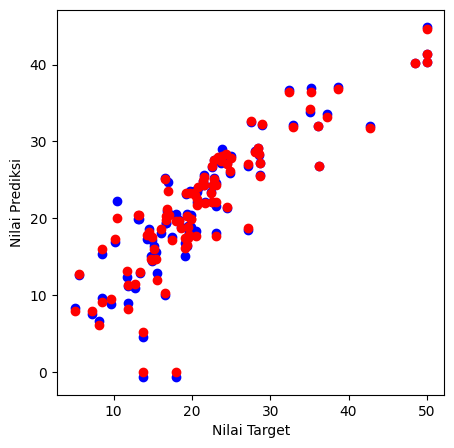

In [230]:
plt.figure(figsize=(5,5))
plt.scatter(y_test_no_RAD,model_no_RAD.predict(x_test_no_RAD),color='blue',label='no RAD')
plt.scatter(y_test_no_TAX,model_no_TAX.predict(x_test_no_TAX),color='red',label='no TAX')
xlabel = 'Nilai Target'
ylabel = 'Nilai Prediksi'
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()

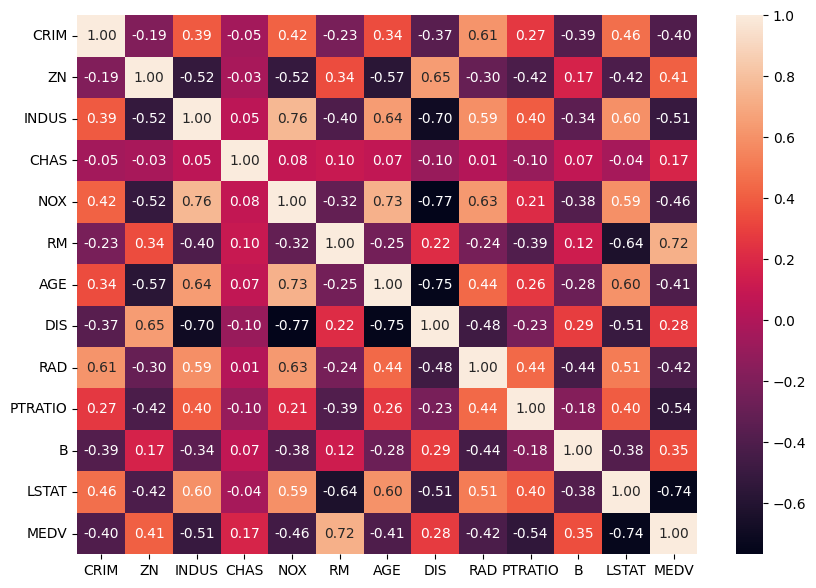

In [243]:
# Melakukan visualisasi heat map untuk melihat korelasi antar variable (Multicollinearity) Tanpa Variabel TAX
dataset_no_TAX = pd.concat([features_no_TAX,target],axis=1)
plt.figure(figsize=(10,7))
sns.heatmap(dataset_no_TAX.corr(), annot=True, fmt='.2f')
plt.show()

Berdasarkan gambar di atas, sudah tidak terlihat lagi korelasi antar variabel seperti sebelumnya antara RAD vs TAX mencapai 0.90, namun terihat masih adanya variabel yang cukup tinggi diantaranya:
1. NOX vs INDUS mencapai 0.76
2. AGE vs NOX mencapai 0.73

Mungkin bisa dengan menghilangkan NOX (karena terkorelasi dengan INDUS dan AGE) kedepannya dapat diperoleh hasil yang lebih baik.

---
Powered by : <br>
<img src="https://lh3.googleusercontent.com/ayfbbgvQolM_Ys9VYRVFD6FjDJXSebI9sN1VtY4ppp65dXepA6JCKgKMM_porWAErGQmc8l-L_RXq080SJ3FbYTIsyxYqWWTuAX8A3VtafWLUwAnnxNnjR1s-3BMCUlF34fYnViLuutxrLm3nEpoix0" width="20%">
<br><br>
<a href="www.linkedin.com/in/iqbalfauzanh"><img src="https://img.shields.io/badge/-© 2025 Iqbal Fauzan Herlambang-417DAC?style=for-the-badge&logoColor=white"/></a>